## Assignment 3

This is a homework from CSCE 5063 – 001 Machine Learning tought by Dr. Lu Zhang and collected from http://csce.uark.edu/~lz006/course/2021fall/projects.htm

In [3]:
## import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## load necessary files

X_mat = pd.read_csv ('data\X.csv', header=None).to_numpy()
X_mat = np.append(np.ones(X_mat.shape[0]).reshape(X_mat.shape[0], 1), X_mat, axis = 1)

Y_colmat = pd.read_csv ('data\Y.csv', header=None).to_numpy()


In [5]:
## transform Y into a 5000 X 10 matrix

Y_list = np.concatenate(Y_colmat).tolist()

Y_mat = pd.get_dummies(Y_list).to_numpy()

print(np.sum(Y_mat, axis = 0))

[500 500 500 500 500 500 500 500 500 500]


In [6]:
## test cells

test_pos = np.array([2171, 145, 1582, 2446, 3393, 815, 1378, 529, 3945, 4628]) 

## training data

X_train = np.delete(X_mat, test_pos, 0)

Y_train = np.delete(Y_mat, test_pos, 0)

## testing data 

X_test = X_mat[test_pos, ]

Y_test = Y_mat[test_pos, ]


In [7]:
## load intial values of the weights

initial_W1 = pd.read_csv('data\initial_W1.csv', header = None).to_numpy()
initial_W2 = pd.read_csv('data\initial_W2.csv', header = None).to_numpy()

#print(initial_W1.shape)
#print(initial_W2.shape)


## Define activation function


In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Forward propagation

In [9]:
## Forward propagation

def forward_propagation(X, W1, W2):
    ## adding 1 in the first column
    Z1 = np.dot(X, W1.T)
    H = sigmoid(Z1)
    H_new = np.append(np.ones(H.shape[0]).reshape(H.shape[0], 1), H, axis = 1)
    Z2 = np.dot(H_new, W2.T)
    prob = sigmoid(Z2)
    cache = {"Z1": Z1,
             "H": H_new,
             "Z2": Z2}
    return prob, cache


In [10]:
## load intial values of the weights

W1_check = pd.read_csv('data\W1.csv', header = None).to_numpy()
W2_check = pd.read_csv('data\W2.csv', header = None).to_numpy()

#print(W1_check.shape)
#print(W2_check.shape)


In [11]:
## check Forward propagation and prediction
Y_prob, cache = forward_propagation(X_mat, W1_check, W2_check)
Y_pred = np.argmax(Y_prob, axis = 1) + 1

k = (Y_colmat.reshape(Y_colmat.shape[0], ) == Y_pred).astype(int)
Accuracy = np.sum(k)/k.shape[0]
print('Accuracy = ', Accuracy)


Accuracy =  0.9752


In [12]:
Z1 = cache['Z1']
H = cache['H']
Z2 = cache['Z2']

## Loss function

In [13]:
## Loss function
def loss_function(prob, y, W1, W2, penalty, m):
    part1 = np.sum(- (y*np.log(prob)) - ((1-y)*np.log(1-prob)))/m
    part2 = penalty * (np.sum(np.square(W1)) + np.sum(np.square(W2)))/(2*m)
    loss = part1 + part2
    return(loss)

In [14]:
## check loss_function

loss = loss_function(Y_prob, Y_mat, np.delete(W1_check, 0, 1), np.delete(W2_check, 0, 1), penalty = 3, m = Y_mat.shape[0])

print('Loss = ', loss)

Loss =  0.5760510303521469


In [15]:
# Backward_propagation
def backward_propagation(X, Y, Y_prob, W1, W2, H, lamb, m):
    
    ## Step 1
    beta_2 = Y_prob - Y

    ## Step 2
    sigmoid_Z1 = np.delete(H, 0, 1)
    grad_sigmoid_Z1 = (sigmoid_Z1*(1-sigmoid_Z1))
    beta_1  = (np.dot(beta_2, W2))* grad_sigmoid_Z1
	
    ## Step 3
    part1_dJ_W2 = np.dot(beta_2.T, H)/m
    W2_temp = np.append(np.zeros(W2.shape[0]).reshape(W2.shape[0], 1), W2, axis = 1)
    part2_dJ_W2 = ((lamb/m) * W2_temp)
    dJ_W2 = part1_dJ_W2 + part2_dJ_W2

    ## Step 4
    part1_dJ_W1 = np.dot(beta_1.T, X)/m
    W1_temp = np.append(np.zeros(W1.shape[0]).reshape(W1.shape[0], 1), W1, axis = 1)
    part2_dJ_W1 = ((lamb/m) * W1_temp)
    dJ_W1 = part1_dJ_W1 + part2_dJ_W1
    
    grads = {"dW1": dJ_W1,
             "dW2": dJ_W2}
    
    return grads

In [16]:
## to check the back propagation function

W1_grad_iter1 = pd.read_excel('data\W1_grad.xlsx', header = None, sheet_name="iter 1").to_numpy()
W1_grad_iter2 = pd.read_excel('data\W1_grad.xlsx', header = None, sheet_name="iter 2").to_numpy()
W1_grad_iter3 = pd.read_excel('W1_grad.xlsx', header = None, sheet_name="iter 3").to_numpy()

W2_grad_iter1 = pd.read_excel('data\W2_grad.xlsx', header = None, sheet_name="iter 1").to_numpy()
W2_grad_iter2 = pd.read_excel('data\W2_grad.xlsx', header = None, sheet_name="iter 2").to_numpy()
W2_grad_iter3 = pd.read_excel('data\W2_grad.xlsx', header = None, sheet_name="iter 3").to_numpy()

In [17]:
# update_parameters
def update_parameters(W1, W2, dW1, dW2, learning_rate):
   
    # Update rule for each parameter
    W1_updated = W1 - (dW1*learning_rate)
    W2_updated = W2 - (dW2*learning_rate)
    ### END CODE HERE ###
    
    parameters = {"W1": W1_updated,
                  "W2": W2_updated}
    
    return parameters

False True
Cost after iteration 0: 6.983948
False True
False True
Cost after iteration 100: 2.970849
Cost after iteration 200: 2.265201
Cost after iteration 300: 1.810265
Cost after iteration 400: 1.523561
Cost after iteration 500: 1.327375
Accuracy =  85.82 %


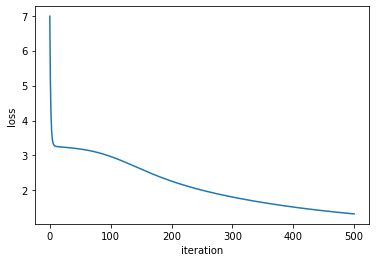

In [18]:
## run the function on the whole data and check the accuracy 85.82% for debug purpose

lossHistory = []
loss = 0

m = Y_mat.shape[0]
W1 = initial_W1
W2 = initial_W2

for i in range(501):
    	
    # Forward propagation
    
    Y_prob, cache = forward_propagation(X_mat, W1, W2)
    
    Z1 = cache['Z1']
    H = cache['H']
    Z2 = cache['Z2']

    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
    back_prop = backward_propagation(X_mat, Y_mat, Y_prob, np.delete(W1, 0, 1), np.delete(W2, 0, 1), H, lamb = 3, m = m)

    dW1 = back_prop['dW1']
    dW2 = back_prop['dW2']
    
    if i == 0:
        print(np.allclose(dW1, W1_grad_iter1), np.allclose(dW2, W2_grad_iter1))
		
    if i == 1:
        print(np.allclose(dW1, W1_grad_iter2), np.allclose(dW2, W2_grad_iter2))

    if i == 2:
        print(np.allclose(dW1, W1_grad_iter3), np.allclose(dW2, W2_grad_iter3))
		
    # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        
    parameters = update_parameters(W1, W2, dW1, dW2, learning_rate = 0.2)
    
    W1 = parameters['W1']
    W2 = parameters['W2']

   # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
    loss = loss_function(Y_prob, Y_mat, np.delete(W1, 0, 1), np.delete(W2, 0, 1), penalty = 3, m = m)
 #   print(loss)

    lossHistory.append(loss)
    if  i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, loss))

Y_pred = np.argmax(Y_prob, axis = 1) + 1
Y_true = Y_colmat
k = (Y_true.reshape(Y_true.shape[0], ) == Y_pred).astype(int)
Accuracy = np.sum(k)/k.shape[0]
print('Accuracy = ', Accuracy*100, '%')

# Finally plot the cost of each iteration
plt.plot(lossHistory)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

Cost after iteration 0: 6.983858
Cost after iteration 100: 2.971408
Cost after iteration 200: 2.266140
Cost after iteration 300: 1.810957
Cost after iteration 400: 1.523998
Cost after iteration 500: 1.327612


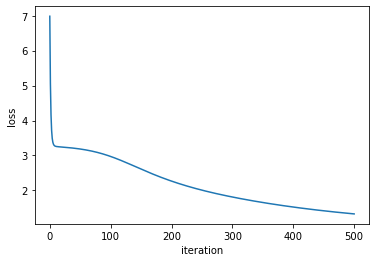

In [19]:
lossHistory = []
loss = 0

m = Y_train.shape[0]
W1 = initial_W1
W2 = initial_W2
for i in range(501):
    	
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
    
    Y_prob, cache = forward_propagation(X_train, W1, W2)
    
    Z1 = cache['Z1']
    H = cache['H']
    Z2 = cache['Z2']

 	
    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
    back_prop = backward_propagation(X_train, Y_train, Y_prob, np.delete(W1, 0, 1), np.delete(W2, 0, 1), H, lamb = 3, m = m)

    dW1 = back_prop['dW1']
    dW2 = back_prop['dW2']
        
    # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        
    parameters = update_parameters(W1, W2, dW1, dW2, learning_rate = 0.2)
    
    W1 = parameters['W1']
    W2 = parameters['W2']

   # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
    loss = loss_function(Y_prob, Y_train, np.delete(W1, 0, 1), np.delete(W2, 0, 1), penalty = 3, m = m)
 #   print(loss)

    lossHistory.append(loss)
    if  i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, loss))

'''
## compute the accuracy of the model
Y_pred = np.argmax(Y_prob, axis = 1) + 1
Y_true = np.delete(Y_colmat, test_pos, 0) 
k = (Y_true.reshape(Y_true.shape[0], ) == Y_pred).astype(int)
Accuracy = np.sum(k)/k.shape[0]
print('Accuracy = ', Accuracy*100, '%')
'''

# Finally plot the cost of each iteration
plt.plot(lossHistory)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

In [20]:
## Do the prediction and compare them with the test data 

Y_prob, cache = forward_propagation(X_test, parameters['W1'], parameters['W2'])
Y_pred = np.argmax(Y_prob, 1) + 1
true_digits = np.squeeze(Y_colmat[test_pos,:])
df = pd.DataFrame({'samples': test_pos,'True Class': true_digits, 'Predicted Class': Y_pred } )
print("The 10 samples and their predicted class is shown below: ")
print(df)

The 10 samples and their predicted class is shown below: 
   samples  True Class  Predicted Class
0     2171           4                9
1      145          10               10
2     1582           3                3
3     2446           4                4
4     3393           6                6
5      815           1                1
6     1378           2                2
7      529           1                1
8     3945           7                7
9     4628           9                9
